# Курсовая работа. Блок ML

&nbsp;&nbsp;&nbsp;&nbsp; Стоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа включает в себя следующие пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 


<br><br>

_________

[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

full_data = pd.read_csv('telecom_users.csv')

full_data.head()


,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [4]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


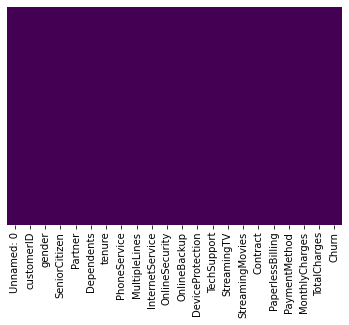

In [5]:
sns.heatmap(full_data.isnull(),cbar=False,yticklabels=False,cmap = 'viridis');

In [6]:
full_data.TotalCharges = pd.to_numeric(full_data.TotalCharges, errors='coerce')
full_data.TotalCharges.replace(np.nan, 0, inplace=True)

In [7]:
full_data.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213,2294.221559
std,2035.705666,0.367909,24.516391,30.114702,2274.164124
min,0.000000,0.000000,0.000000,18.250000,0.000000
25%,1777.250000,0.000000,9.000000,35.650000,401.587500
50%,3546.500000,0.000000,29.000000,70.400000,1408.575000
75%,5291.750000,0.000000,56.000000,89.900000,3841.500000
max,7042.000000,1.000000,72.000000,118.750000,8684.800000


In [8]:
full_data.describe(include=object)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,5986,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7010-BRBUU,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,4399


In [9]:
count = full_data.describe(include=object).loc['count', 'Churn']
users_left = count - full_data.describe(include=object).loc['freq', 'Churn']
churn = round(users_left / count * 100, 1)

In [10]:
full_data.SeniorCitizen.sum() / len(full_data) * 100


16.137654527230204

In [11]:
for i in full_data.iloc[:, 10:16]:
    print(f'У {round(full_data[i].value_counts().Yes / len(full_data) * 100, 1)}% не подключена услуга {i}')

У 28.6% не подключена услуга OnlineSecurity
У 34.9% не подключена услуга OnlineBackup
У 34.3% не подключена услуга DeviceProtection
У 29.0% не подключена услуга TechSupport
У 38.5% не подключена услуга StreamingTV
У 39.1% не подключена услуга StreamingMovies


In [12]:
print('Выводы на основе имеющихся данных:')
print('\t- Чуть больше половины клиентов - мужчины')
print('\t- Большинство клиентов не состоят в браке и/или не имеют иждивенцев')
print('\t- Средний ежемесячный чек - 64.8 у.е.')
print('\t- ~16% среди пользователей - пенсионеры')
print('\t- У подавляющего большинства клиентов (~65%) не подключены никакие дополнительные услуги')
print('\t- Наиболее популярный способ подключения интернета у клиентов - оптоволокно')
print('\t- В среднем клиенты пользуются услугами компании 32 месяца')
print('\t- Больше половины клиентов заключили month-to-month договор')
print('\t- Большинство клиентов предпочитают безбумажный биллинг и/или оплату электронным чеком')
print(f'\t- Отток клиентов за отчётный период составляет {churn}%')

Выводы на основе имеющихся данных:
	- Чуть больше половины клиентов - мужчины
	- Большинство клиентов не состоят в браке и/или не имеют иждивенцев
	- Средний ежемесячный чек - 64.8 у.е.
	- ~16% среди пользователей - пенсионеры
	- У подавляющего большинства клиентов (~65%) не подключены никакие дополнительные услуги
	- Наиболее популярный способ подключения интернета у клиентов - оптоволокно
	- В среднем клиенты пользуются услугами компании 32 месяца
	- Больше половины клиентов заключили month-to-month договор
	- Большинство клиентов предпочитают безбумажный биллинг и/или оплату электронным чеком
	- Отток клиентов за отчётный период составляет 26.5%


# 2. Исследование зависимостей и формулирование гипотез

In [12]:
def classificator(df):
    for feature in list(df.columns):
        if df[feature].dtype == 'O':
            df[feature].replace(['Yes', 'No'], [1, 0], inplace=True)  
            for iteration, value in enumerate(list(df[feature].unique())):  
                if type(value) == str:
                    if df[feature].nunique() > 2: 
                        iteration += 1
                    df[feature].replace(value, iteration, inplace=True) 


full_data_mapped = full_data.copy()
classificator(full_data_mapped)
full_data_mapped.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,1,0,0,1,1,72,1,1,0,...,1,1,1,1,1,0,1,24.10,1734.65,0
1,4528,2,1,0,0,0,44,1,0,2,...,1,0,1,0,2,1,1,88.15,3973.20,0
2,6344,3,1,1,1,0,38,1,1,2,...,0,0,0,0,2,1,2,74.95,2869.85,1
3,6739,4,0,0,0,0,4,1,0,3,...,0,0,0,1,2,1,3,55.90,238.50,0
4,432,5,0,0,0,0,2,1,0,3,...,1,0,0,0,2,0,3,53.45,119.50,0


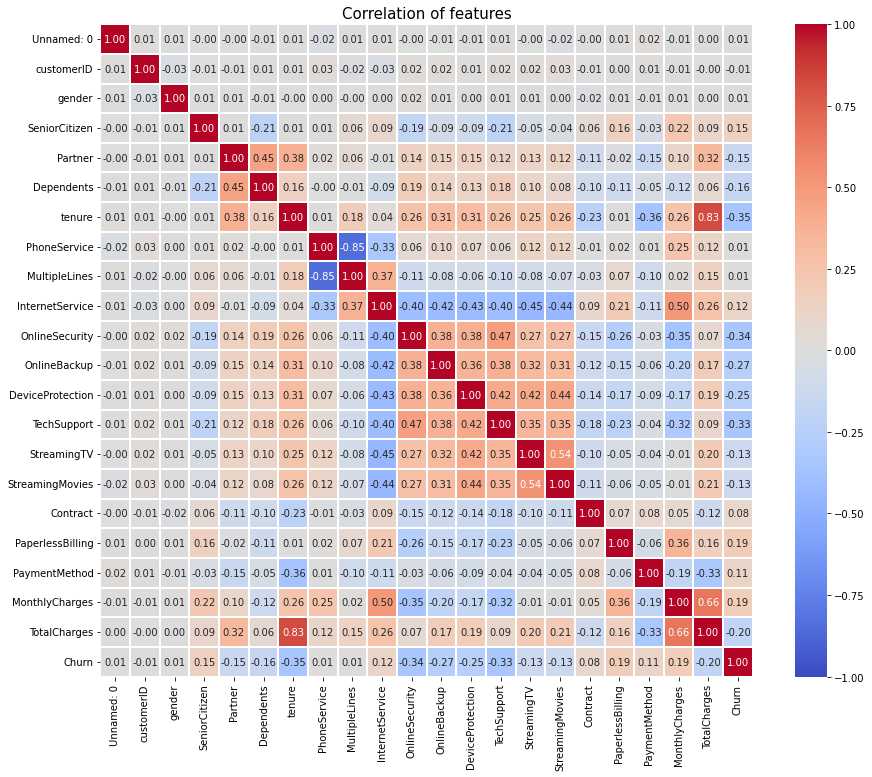

In [73]:
colourmap = sns.color_palette('coolwarm',as_cmap=True)
fig = plt.figure(figsize=(15,12))
sns.heatmap(data=full_data_mapped.corr(), cmap=colourmap, linewidths=0.1, vmax=1.0, vmin=-1.0, annot=True, fmt='.2f', square=True)
plt.title('Correlation of features', y=1, size=15)
plt.show()

In [14]:
#del full_data_mapped['Unnamed: 0']
full_data_mapped.head(3)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,1,0,0,1,1,72,1,1,0,...,1,1,1,1,1,0,1,24.10,1734.65,0
1,4528,2,1,0,0,0,44,1,0,2,...,1,0,1,0,2,1,1,88.15,3973.20,0
2,6344,3,1,1,1,0,38,1,1,2,...,0,0,0,0,2,1,2,74.95,2869.85,1


In [101]:
add_services = full_data_mapped[['Churn', 'OnlineSecurity', 'TechSupport', 'OnlineBackup', 'DeviceProtection', 'PaperlessBilling']].groupby('Churn').agg('sum')
add_services

,OnlineSecurity,TechSupport,OnlineBackup,DeviceProtection,PaperlessBilling
Churn,,,,,
0,2659,2661,2832,2790,2347
1,345,365,549,556,1181


In [102]:
add_services.iloc[0, :] = add_services.iloc[0, :] / (full_data_mapped.Churn.count() - full_data_mapped.Churn.sum()) * 100
add_services.iloc[1, :] = add_services.iloc[1, :] / full_data_mapped.Churn.sum() * 100
add_services

,OnlineSecurity,TechSupport,OnlineBackup,DeviceProtection,PaperlessBilling
Churn,,,,,
0,60.445556,60.491021,64.378268,63.423505,53.353035
1,21.739130,22.999370,34.593573,35.034657,74.417139


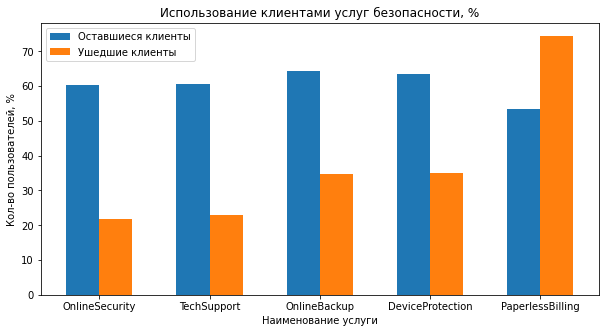

In [125]:
#Как это можно сделать с помощью Seaborn? Можно ли как-то построить график по датафрейму add_services, не изменяя его?
#Как в Seaborn подписывать значения столбцов? (например над левым столбцом online security надписать 60)

labels = add_services.columns
percent_0 = add_services.iloc[0, :]
percent_1 = add_services.iloc[1, :]

x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(10, 5))  
rects1 = ax.bar(x - 0.3/2, percent_0, width=0.3, label='Оставшиеся клиенты')  
rects2 = ax.bar(x + 0.3/2, percent_1, width=0.3, label='Ушедшие клиенты')  

ax.set_ylabel('Кол-во пользователей, %')
ax.set_xlabel('Наименование услуги')
ax.set_title('Использование клиентами услуг безопасности, %')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper left')

plt.show()

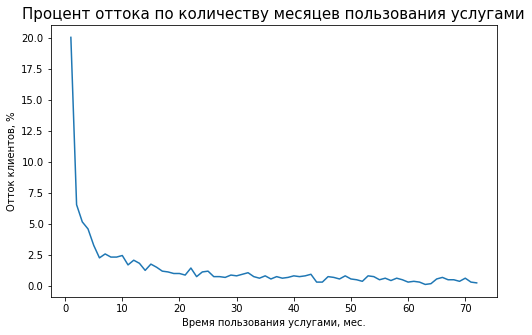

In [126]:
tenure_churn_percentage = full_data_mapped[full_data_mapped.Churn == 1][['Churn', 'tenure']].groupby('tenure').sum()
tenure_churn_percentage.Churn = list(map(lambda x: (x / full_data_mapped.Churn.sum()) * 100, tenure_churn_percentage.Churn))

plt.figure(figsize=(8, 5))
plt.plot(tenure_churn_percentage.index, tenure_churn_percentage.Churn)
plt.title('Процент оттока по количеству месяцев пользования услугами', size=15)
plt.xlabel('Время пользования услугами, мес.')
plt.ylabel('Отток клиентов, %')


plt.show()

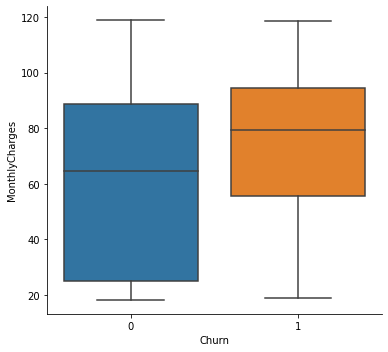

In [127]:
sns.catplot(data=full_data_mapped, x='Churn', y='MonthlyCharges', aspect=1.1, height=5, kind='box')

In [128]:
print('Медианное значение абонентской платы у группы оттока оказалось выше,\n'
      'чем у группы активных клиентов несмотря на то, \n'
      'что большинство ушедших клиентов не пользовалось услугами безопасности.')


Медианное значение абонентской платы у группы оттока оказалось выше,
чем у группы активных клиентов несмотря на то, 
что большинство ушедших клиентов не пользовалось услугами безопасности.


In [129]:
print('Выводы на основе проведённого анализа:')
print('\t- Около 20% ушедших клиентов перестали пользоваться услугами в течение первого месяца.')
print(f'\t- Больше половины ({round(tenure_churn_percentage.iloc[:12, 0].sum(), 1)}%) клиентов из группы оттока перестали пользоваться услугами в течение года.\n\n')

print('Гипотезы на основе проведённого анализа:')
print('\t- Одной из основных причин оттока клиентов является отсутствие подписки на услуги безопасности и использование электронных счетов.')
print('\t- По причине отсутствия подписок на услуги безопасности ушедшие клиенты переплачивали за месячное пользование связью.')

Выводы на основе проведённого анализа:
	- Около 20% ушедших клиентов перестали пользоваться услугами в течение первого месяца.
	- Больше половины (55.4%) клиентов из группы оттока перестали пользоваться услугами в течение года.


Гипотезы на основе проведённого анализа:
	- Одной из основных причин оттока клиентов является отсутствие подписки на услуги безопасности и использование электронных счетов.
	- По причине отсутствия подписок на услуги безопасности ушедшие клиенты переплачивали за месячное пользование связью.


# 3. Построение моделей для прогнозирования оттока

In [130]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold


from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score

In [131]:
knn_params = {'n_neighbors': np.arange(1, 10, 1)}

gbc_params = {'learning_rate': np.arange(0.1, 0.6, 0.1)}

rfc_params = {'n_estimators': range(10, 100, 10),
              'min_samples_leaf': range(1, 7)}

svc_params = {'kernel': ['linear', 'rbf'],
              'C': np.arange(0.1, 1, 0.2)}

lr_params = {'C': np.arange(0.2, 1, 0.1)}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [84]:
data = full_data_mapped[['tenure', 'OnlineSecurity', 'TechSupport', 'OnlineBackup', 'DeviceProtection', 'MonthlyCharges', 'PaperlessBilling']]
target = full_data_mapped['Churn']

data_train, data_valid, target_train, target_valid = train_test_split(data, target, stratify=target, test_size=.3, random_state=0)

In [93]:
knn = KNeighborsClassifier()
gbc = GradientBoostingClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
svc = SVC(random_state=0, probability=True)
lr = LogisticRegression(random_state=0,
                        solver='liblinear')

knn_gscv = GridSearchCV(estimator=knn, param_grid=knn_params, cv=skf)
gbc_gscv = GridSearchCV(estimator=gbc, param_grid=gbc_params, cv=skf)
rfc_gscv = GridSearchCV(estimator=rfc, param_grid=rfc_params, cv=skf)
svc_gscv = GridSearchCV(estimator=svc, param_grid=svc_params, cv=skf)
lr_gscv = GridSearchCV(estimator=lr, param_grid=lr_params, cv=skf)

knn_model = knn_gscv.fit(data_train, target_train)
gbc_model = gbc_gscv.fit(data_train, target_train)
rfc_model = rfc_gscv.fit(data_train, target_train)
svc_model = svc_gscv.fit(data_train, target_train)
lr_model = lr_gscv.fit(data_train, target_train)

In [132]:
print('Лучшие параметры:')
print(f'KNeighborsClassifier: %s \nGradientBoostingClassifier: %s \nRandomForestClassifier: %s \nSVC: %s \nLogisticRegression: %s' %(
                                                                knn_gscv.best_params_,
                                                                gbc_gscv.best_params_,
                                                                rfc_gscv.best_params_,
                                                                svc_gscv.best_params_,
                                                                lr_gscv.best_params_))

Лучшие параметры:
KNeighborsClassifier: {'n_neighbors': 8} 
GradientBoostingClassifier: {'learning_rate': 0.1} 
RandomForestClassifier: {'min_samples_leaf': 5, 'n_estimators': 80} 
SVC: {'C': 0.1, 'kernel': 'rbf'} 
LogisticRegression: {'C': 0.9000000000000001}


# 4. Сравнение качества моделей 

In [133]:
knn_predict = knn_model.predict(data_valid)
gbc_predict = gbc_model.predict(data_valid)
rfc_predict = rfc_model.predict(data_valid)
svc_predict = svc_model.predict(data_valid)
lr_predict = lr_model.predict(data_valid)

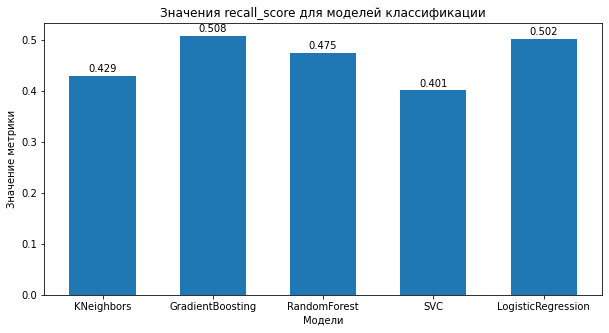

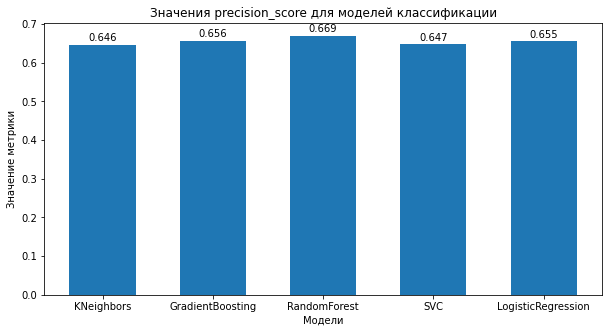

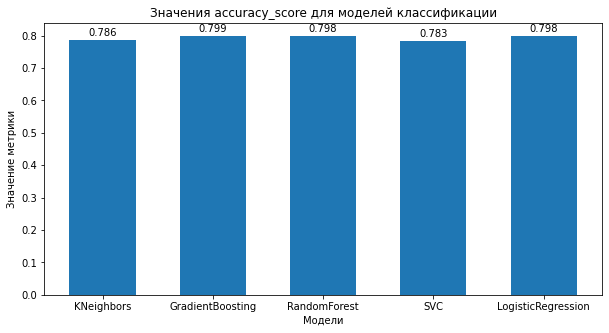

In [134]:
#Можно ли эти графики сделать проще? (с помощью того же Seaborn, например)

metrics_scores = [recall_score, precision_score, accuracy_score]
predicts = [knn_predict, gbc_predict, rfc_predict, svc_predict, lr_predict]
models_names = ['KNeighbors', 'GradientBoosting', 'RandomForest', 'SVC', 'LogisticRegression']
scores_names = ['recall_score', 'precision_score', 'accuracy_score']
values_list = []
for i, score in enumerate(metrics_scores):
    for predict in predicts:
        values_list.append(round(score(target_valid, predict),3))    
    
    x = np.arange(len(models_names))
    
    fig, ax = plt.subplots(figsize=(10,5))
    rects = ax.bar(x, values_list, 0.6)
    
    ax.set_ylabel('Значение метрики')
    ax.set_xlabel('Модели')
    ax.set_title(f'Значения {scores_names[i]} для моделей классификации')
    ax.set_xticks(x)
    ax.set_xticklabels(models_names)
   
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 2),
                        textcoords="offset points",  
                        ha='center', va='bottom')
    
    autolabel(rects)
    values_list = []
    
plt.show()

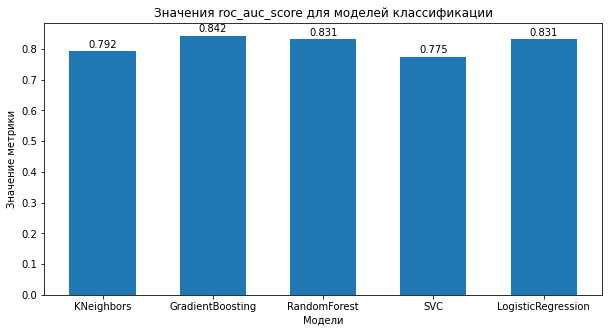

In [135]:
auc_list = []
models = [knn_model, gbc_model, rfc_model, svc_model, lr_model]
for model in models:
    proba = model.predict_proba(data_valid)
    auc_list.append(round(roc_auc_score(target_valid, proba[:, 1]),3))
    
x = np.arange(len(models_names))

fig, ax = plt.subplots(figsize=(10,5))
rects = ax.bar(x, auc_list, 0.6)

ax.set_ylabel('Значение метрики')
ax.set_xlabel('Модели')
ax.set_title('Значения roc_auc_score для моделей классификации')
ax.set_xticks(x)
ax.set_xticklabels(models_names)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),
                    textcoords="offset points",  
                    ha='center', va='bottom')

autolabel(rects)

plt.show()